In [184]:
txt = 'welcome to the jungle'   #split() method splits a string into a list
x = txt.split()
print (x)

['welcome', 'to', 'the', 'jungle']


In [185]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt

In [186]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East Midlands 4.89 3.34
West Midlands 5.63 3.47
East Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern Ireland 4.02 4.56'''
data_str

'Region Alcohol Tobacco\nNorth 6.47 4.03\nYorkshire 6.13 3.76\nNortheast 6.19 3.77\nEast Midlands 4.89 3.34\nWest Midlands 5.63 3.47\nEast Anglia 4.52 2.92\nSoutheast 5.89 3.20\nSouthwest 4.79 2.71\nWales 5.27 3.53\nScotland 6.08 4.51\nNorthern Ireland 4.02 4.56'

In [187]:
d = data_str.split('\n')
d

['Region Alcohol Tobacco',
 'North 6.47 4.03',
 'Yorkshire 6.13 3.76',
 'Northeast 6.19 3.77',
 'East Midlands 4.89 3.34',
 'West Midlands 5.63 3.47',
 'East Anglia 4.52 2.92',
 'Southeast 5.89 3.20',
 'Southwest 4.79 2.71',
 'Wales 5.27 3.53',
 'Scotland 6.08 4.51',
 'Northern Ireland 4.02 4.56']

In [188]:
for i in range(len(d)):
        d[i]=d[i].split(" ")
        if len(d[i])>3:
            for j in range(len(d[i])-3):
                d[i][j]=d[i][j]+' '+ d[i][j+1]
                del d[i][j+1]        

In [189]:
for i in range(1,len(d)):
    for j in range (1,3):
        d[i][j] = float((d[i][j]))

In [190]:
d

[['Region', 'Alcohol', 'Tobacco'],
 ['North', 6.47, 4.03],
 ['Yorkshire', 6.13, 3.76],
 ['Northeast', 6.19, 3.77],
 ['East Midlands', 4.89, 3.34],
 ['West Midlands', 5.63, 3.47],
 ['East Anglia', 4.52, 2.92],
 ['Southeast', 5.89, 3.2],
 ['Southwest', 4.79, 2.71],
 ['Wales', 5.27, 3.53],
 ['Scotland', 6.08, 4.51],
 ['Northern Ireland', 4.02, 4.56]]

In [191]:
df = DataFrame( d[1:], columns=d[0]) #all data starts after row 1, row 1 is for the column names

In [192]:
df

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


Text(0.5,0,'Tobacco')

Text(0,0.5,'Alcohol')

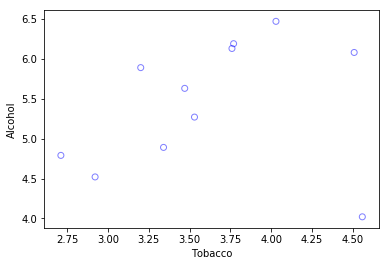

In [193]:
df = DataFrame( d[1:], columns=d[0]) #all data starts after row 1, row 1 is for the column names
plt.scatter( df['Tobacco'], df['Alcohol'],
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.5 )
plt.xlabel('Tobacco')
plt.ylabel('Alcohol')
plt.savefig('alcohol_v_tobacco.png', fmt='png', dpi=100)


In [213]:
df['Eins'] = np.ones((len(df)))
Y = df['Alcohol'][:-1]
X = df[['Tobacco','Eins']][:-1]
result = sm.OLS(Y,X).fit()
result.summary()
result.params

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Fri, 12 Oct 2018   Prob (F-statistic):            0.00723
Time:                        13:38:32   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Eins           2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tobacco    1.005896
Eins       2.041223
dtype: float64